In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [6]:
# https://archive.ics.uci.edu/static/public/53/iris.zip
# cols = ["sepal_length", "sepal_width", "petal_length", "petal_widlth", "class"]
# df = pd.read_csv("../artifacts/iris.data", sep=",", header=None, names=cols)

In [11]:
# after downloading the dataset using the above link uncomment the below lines to correct the changes in dataset "refer the iris.names for more details"

# df.iloc[34, 3] = 0.2
# df.iloc[37, 1] = 3.6
# df.iloc[37, 2] = 1.4

# after changing the details save the dataframe to csv using the below line
# df.to_csv("artifacts/final.csv", index=False)

In [3]:
df = pd.read_csv("../artifacts/final.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_widlth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_widlth,class
12,4.8,3.0,1.4,0.1,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa


In [52]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_widlth  150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.1 KB


In [53]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_widlth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


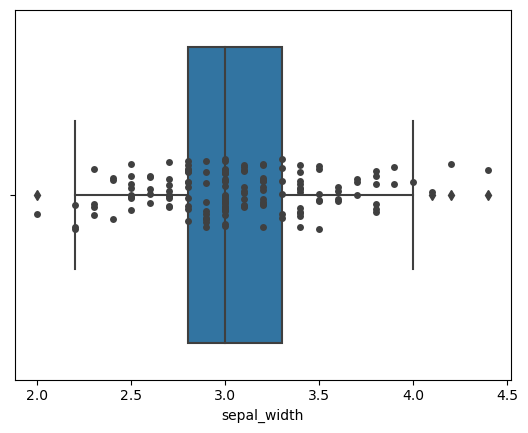

In [7]:
sns.boxplot(x=df["sepal_width"])
sns.stripplot(x=df["sepal_width"], color=".25")
plt.show()

<Axes: xlabel='sepal_width'>

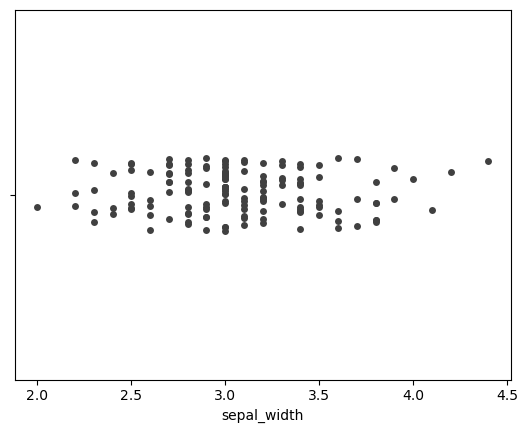

C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


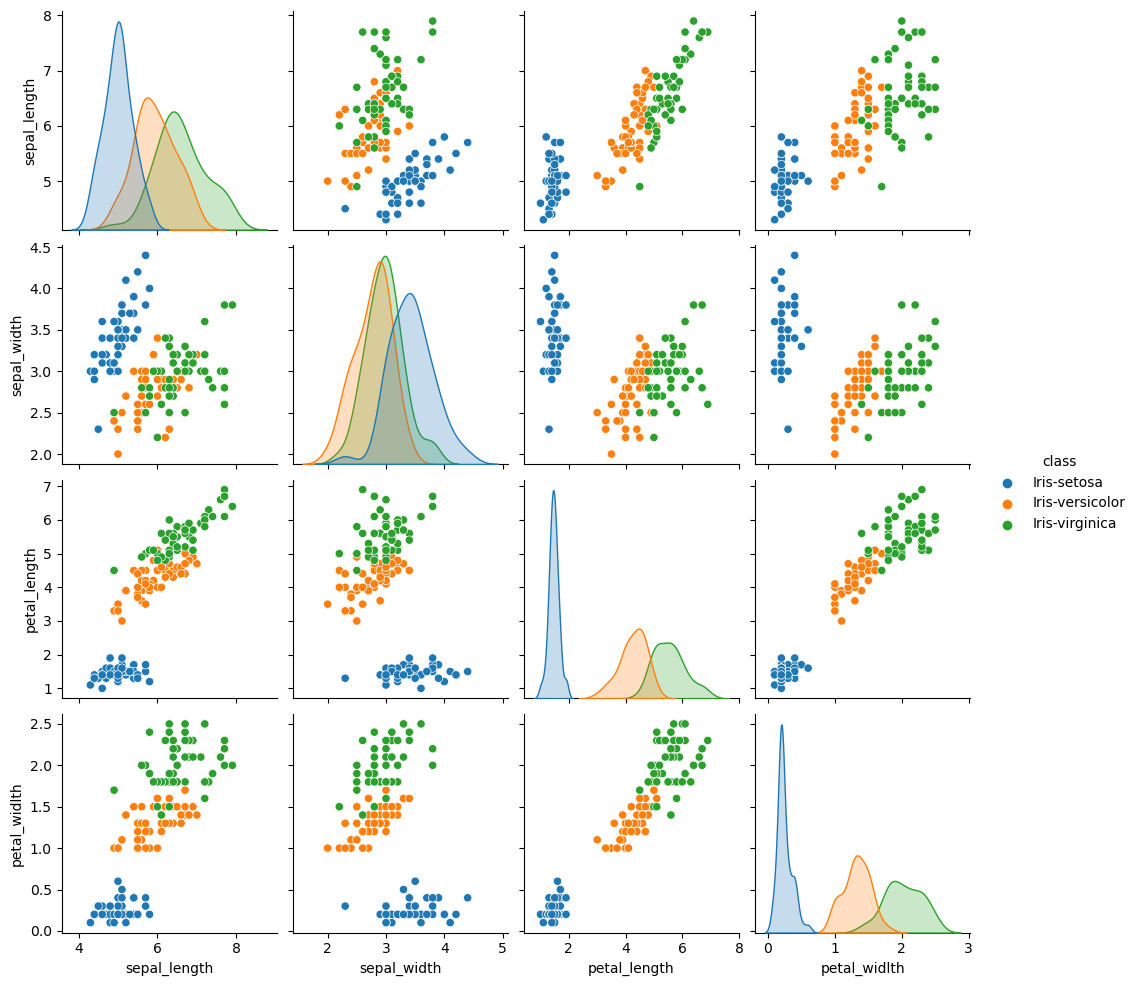

In [5]:
sns.pairplot(df,hue="class")
plt.show()

In [5]:
X = df.iloc[:, :-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_widlth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y = df.iloc[:, -1]
y.head()

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [8]:
X_train, y_train, X_test, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
print(
    "Training features size: {}\nTraining target size: \t{}\n\nTesting features size: \t{}\nTesting target size: \t{}".format(
        X_train.shape, X_test.shape, y_train.shape, y_test.shape
    )
)

Training features size: (120, 4)
Training target size: 	(120,)

Testing features size: 	(30, 4)
Testing target size: 	(30,)


In [20]:
lr = LogisticRegression(max_iter=5000)

In [21]:
lr.fit(X_train, X_test)

LogisticRegression(max_iter=5000)

In [23]:
y_pred = lr.predict(y_train)

In [26]:
accuracy_score(y_test, y_pred)

1.0

In [27]:
rf = RandomForestClassifier()

In [29]:
rf.fit(X_train, X_test)

RandomForestClassifier()

In [30]:
rf_y = rf.predict(y_train)

In [31]:
accuracy_score(y_test, rf_y)

1.0

In [ ]:
confusion_matrix()